In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 6

### Explore wage data set
Data borrowed from [ISLR package](https://cran.r-project.org/web/packages/ISLR/)

In [39]:
# Wage dataset from https://cran.r-project.org/web/packages/ISLR/
df = pd.read_csv('./data/wage_data.csv', index_col=0)
df

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
...,...,...,...,...,...,...,...,...,...,...,...,...
10033,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
14375,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033
453557,2009,55,1. Male,5. Separated,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913


In [40]:
pd.options.display.max_rows = 10
print(df.describe())
pd.options.display.max_rows = 6

              year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430


In [41]:
df.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

In [42]:
df['sex'].unique()

array(['1. Male'], dtype=object)

In [43]:
df['race'].unique()

array(['1. White', '3. Asian', '4. Other', '2. Black'], dtype=object)

In [44]:
df['race'] = df['race'].apply(lambda x: x.split('. ')[1])
df['race'].unique()

array(['White', 'Asian', 'Other', 'Black'], dtype=object)

In [45]:
df['education'].unique()

array(['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad',
       '5. Advanced Degree'], dtype=object)

In [46]:
df['education'] = df['education'].replace({'1. < HS Grad': 'Primary Education', 
                                           '2. HS Grad': 'Secondary Education', 
                                           '3. Some College': 'Postsecondary Education',
                                           '4. College Grad': 'Postsecondary Education', 
                                           '5. Advanced Degree': 'Advanced Degree'})

In [47]:
df['education'].unique()

array(['Primary Education', 'Postsecondary Education',
       'Secondary Education', 'Advanced Degree'], dtype=object)

In [48]:
from collections import Counter
Counter(df.education)

Counter({'Advanced Degree': 426,
         'Postsecondary Education': 1335,
         'Primary Education': 268,
         'Secondary Education': 971})

In [49]:
df['age_class'] = pd.cut(df['age'], [0, 18, 35, 65, np.Inf], labels=['0-18', '19-35', '36-65', '66+'])
df

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,age_class
231655,2006,18,1. Male,1. Never Married,White,Primary Education,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,0-18
86582,2004,24,1. Male,1. Never Married,White,Postsecondary Education,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,19-35
161300,2003,45,1. Male,2. Married,White,Postsecondary Education,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177,36-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,2005,27,1. Male,2. Married,Black,Primary Education,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408,19-35
14375,2005,27,1. Male,1. Never Married,White,Postsecondary Education,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033,19-35
453557,2009,55,1. Male,5. Separated,White,Secondary Education,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.505150,90.481913,36-65


In [50]:
df.groupby('age_class')['wage'].agg([np.mean, np.std])

,mean,std
age_class,,
0-18,64.493063,11.471962
19-35,97.417444,32.976762
36-65,118.494559,43.578145
66+,102.553894,36.939896


In [51]:
df.groupby('race')['wage'].agg([np.mean, np.std])

,mean,std
race,,
Asian,120.288288,46.422514
Black,101.601177,37.162486
Other,89.973326,29.153530
White,112.563666,41.733830


In [52]:
pd.options.display.max_rows = 100
df.groupby(['age_class', 'race'])['wage'].agg([np.mean, np.std])

mean        std
age_class race                        
0-18      Black   70.476020        NaN
          White   63.894767  11.910237
19-35     Asian  112.971113  42.205021
          Black   93.318806  32.915168
          Other   78.895957  22.641586
          White   96.949330  31.783729
36-65     Asian  124.585997  48.510500
          Black  105.550900  39.468244
          Other  100.467677  31.252798
          White  119.686426  43.496410
66+       Asian  114.589507  44.560380
          Black  102.328581  24.840629
          White  101.185054  40.844991

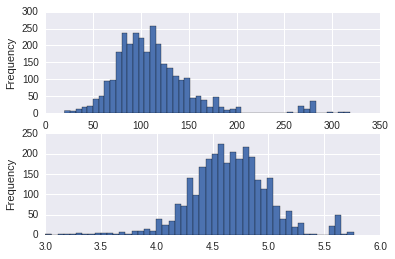

In [53]:
fig, axs = plt.subplots(nrows=2)
df['wage'].plot.hist(bins=50, ax=axs[0])
df['logwage'].plot.hist(bins=50, ax=axs[1])

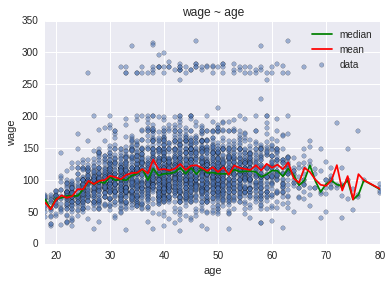

In [54]:
# %% scatter plot wage ~ age
fig, ax = plt.subplots()
df.plot.scatter(x='age', y='wage', title='wage ~ age', alpha=0.5, label='data', ax=ax)

# compute median wage per age and plot
df.groupby('age')['wage'].agg(np.median).plot.line(ax=ax, label='median', color='g')
df.groupby('age')['wage'].agg(np.mean).plot.line(ax=ax, label='mean', color='r')
ax.legend()

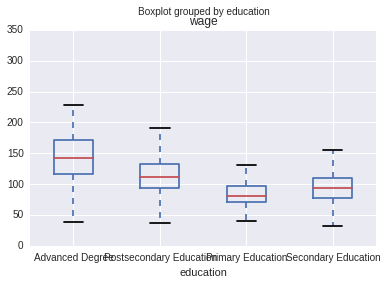

In [55]:
df.boxplot(column='wage', by='education')

### Explore air quality
Data borrowed from [European Air Quality Database](http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8). Also see Joris Van den Bossche's [2015-PyDataParis presentation](https://github.com/jorisvandenbossche/2015-PyDataParis).

In [56]:
# read in data
pd.options.display.max_rows = 7
names = ','.join(['date'] + ["{:02d},flag".format(i) for i in range(24)]).split(',')
df = pd.read_csv('./data/AT90AKC0000800100hour.1-1-1988.31-12-2012',  # measured at AKH-Wien
                 sep='\t', header=None, names=names)
df

,date,00,flag,01,flag,02,flag,03,flag,04,...,19,flag,20,flag,21,flag,22,flag,23,flag
0,1988-01-01,0.00,1,48.80,1,66.00,1,66.00,1,57.40,...,69.80,1,62.10,1,65.00,1,59.30,1,61.20,1
1,1988-01-02,70.80,1,61.20,1,53.50,1,53.50,1,46.90,...,62.10,1,57.40,1,59.30,1,58.30,1,59.30,1
2,1988-01-03,54.50,1,50.70,1,44.00,1,47.80,1,42.10,...,107.10,1,92.70,1,69.80,1,76.50,1,109.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2012-12-29,33.22,1,42.98,1,34.26,1,28.61,1,51.91,...,29.41,1,23.40,1,20.23,1,19.90,1,20.06,1
9130,2012-12-30,20.18,1,15.29,1,13.60,1,14.46,1,14.32,...,55.48,1,65.81,1,58.58,1,66.37,1,74.20,1
9131,2012-12-31,72.85,1,36.85,1,55.21,1,64.44,1,79.94,...,61.90,1,64.80,1,74.46,1,66.60,1,60.85,1


In [57]:
df = df.drop('flag', axis=1)
df

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1988-01-01,0.00,48.80,66.00,66.00,57.40,71.70,63.10,63.10,57.40,...,73.60,87.00,88.00,81.30,73.60,69.80,62.10,65.00,59.30,61.20
1,1988-01-02,70.80,61.20,53.50,53.50,46.90,47.80,44.00,44.90,49.70,...,73.60,68.80,65.00,64.10,64.10,62.10,57.40,59.30,58.30,59.30
2,1988-01-03,54.50,50.70,44.00,47.80,42.10,45.90,54.50,44.90,36.30,...,73.60,89.90,83.20,92.70,110.90,107.10,92.70,69.80,76.50,109.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2012-12-29,33.22,42.98,34.26,28.61,51.91,51.18,34.00,43.24,60.00,...,23.96,24.87,24.15,29.82,34.30,29.41,23.40,20.23,19.90,20.06
9130,2012-12-30,20.18,15.29,13.60,14.46,14.32,15.20,29.88,27.20,24.45,...,27.46,32.66,49.23,40.48,42.89,55.48,65.81,58.58,66.37,74.20
9131,2012-12-31,72.85,36.85,55.21,64.44,79.94,65.91,56.08,70.45,63.66,...,58.23,54.99,48.62,50.35,52.87,61.90,64.80,74.46,66.60,60.85


In [58]:
df = df.set_index('date')
df

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
1988-01-01,0.00,48.80,66.00,66.00,57.40,71.70,63.10,63.10,57.40,59.30,...,73.60,87.00,88.00,81.30,73.60,69.80,62.10,65.00,59.30,61.20
1988-01-02,70.80,61.20,53.50,53.50,46.90,47.80,44.00,44.90,49.70,55.50,...,73.60,68.80,65.00,64.10,64.10,62.10,57.40,59.30,58.30,59.30
1988-01-03,54.50,50.70,44.00,47.80,42.10,45.90,54.50,44.90,36.30,66.00,...,73.60,89.90,83.20,92.70,110.90,107.10,92.70,69.80,76.50,109.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-29,33.22,42.98,34.26,28.61,51.91,51.18,34.00,43.24,60.00,61.15,...,23.96,24.87,24.15,29.82,34.30,29.41,23.40,20.23,19.90,20.06
2012-12-30,20.18,15.29,13.60,14.46,14.32,15.20,29.88,27.20,24.45,23.51,...,27.46,32.66,49.23,40.48,42.89,55.48,65.81,58.58,66.37,74.20
2012-12-31,72.85,36.85,55.21,64.44,79.94,65.91,56.08,70.45,63.66,76.37,...,58.23,54.99,48.62,50.35,52.87,61.90,64.80,74.46,66.60,60.85


In [59]:
# data is not in the right shape, want index to be time and then have only one column
df_stacked = df.stack()
df_stacked

date          
1988-01-01  00     0.00
            01    48.80
            02    66.00
                  ...  
2012-12-31  21    74.46
            22    66.60
            23    60.85
dtype: float64

In [60]:
df_stacked = df_stacked.reset_index(name='no2')
df_stacked

,date,level_1,no2
0,1988-01-01,00,0.00
1,1988-01-01,01,48.80
2,1988-01-01,02,66.00
...,...,...,...
219165,2012-12-31,21,74.46
219166,2012-12-31,22,66.60
219167,2012-12-31,23,60.85


In [61]:
df_stacked.index = pd.to_datetime(df_stacked['date'] + df_stacked['level_1'], format="%Y-%m-%d%H")
df_stacked = df_stacked.drop(['date', 'level_1'], axis=1)

df_stacked

,no2
1988-01-01 00:00:00,0.00
1988-01-01 01:00:00,48.80
1988-01-01 02:00:00,66.00
...,...
2012-12-31 21:00:00,74.46
2012-12-31 22:00:00,66.60
2012-12-31 23:00:00,60.85


In [62]:
df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219168 entries, 1988-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 1 columns):
no2    219168 non-null float64
dtypes: float64(1)
memory usage: 3.3 MB


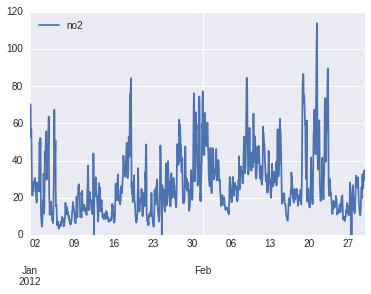

In [63]:
# partial string indexing
df_stacked['2012-01':'2012-02'].plot()

In [64]:
# pandas power - resampling
df_stacked.resample('D').head()

,no2
1988-01-01,63.670833
1988-01-02,60.595833
1988-01-03,69.795833
1988-01-04,102.741667
1988-01-05,95.062500


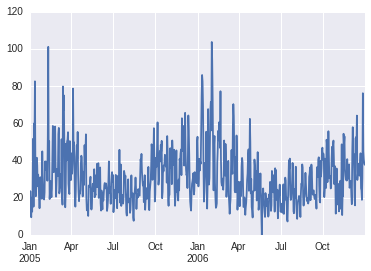

In [65]:
df_stacked.resample('D')['no2']['2005':'2006'].plot.line()

In [66]:
# a datetimeindex knows about weekdays
df_stacked.index.weekday

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [67]:
df_stacked['weekday'] = df_stacked.index.weekday
df_stacked['hour'] = df_stacked.index.hour
df_stacked

,no2,weekday,hour
1988-01-01 00:00:00,0.00,4,0
1988-01-01 01:00:00,48.80,4,1
1988-01-01 02:00:00,66.00,4,2
...,...,...,...
2012-12-31 21:00:00,74.46,0,21
2012-12-31 22:00:00,66.60,0,22
2012-12-31 23:00:00,60.85,0,23


In [68]:
# introduce new variable to compare emissions on weekends
df_stacked['is_weekend'] = df_stacked['weekday'].isin([5, 6])
df_stacked

,no2,weekday,hour,is_weekend
1988-01-01 00:00:00,0.00,4,0,False
1988-01-01 01:00:00,48.80,4,1,False
1988-01-01 02:00:00,66.00,4,2,False
...,...,...,...,...
2012-12-31 21:00:00,74.46,0,21,False
2012-12-31 22:00:00,66.60,0,22,False
2012-12-31 23:00:00,60.85,0,23,False


In [69]:
df_agg = df_stacked.groupby(['is_weekend', 'hour'], as_index=False).agg(np.median)
df_agg

,is_weekend,hour,no2,weekday
0,False,0,26.43,2.0
1,False,1,23.00,2.0
2,False,2,20.00,2.0
...,...,...,...,...
45,True,21,32.00,5.5
46,True,22,31.00,5.5
47,True,23,29.00,5.5


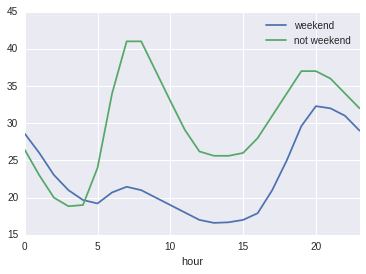

In [70]:
fig, ax = plt.subplots()
df_agg[df_agg['is_weekend'] == True].plot.line(x='hour', y='no2', ax=ax, label='weekend')
df_agg[df_agg['is_weekend'] == False].plot.line(x='hour', y='no2', ax=ax, label='not weekend')